In [28]:
'''
https://medium.com/@nabanita.sarkar/simulating-amplitude-modulation-using-python-6ed03eb4e712#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjM4ZjM4ODM0NjhmYzY1OWFiYjQ0NzVmMzYzMTNkMjI1ODVjMmQ3Y2EiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTM2MTY0NzIsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNzQ0Mzg1MzQyMjE3OTA2NTYyNyIsImVtYWlsIjoiZ3Vpc2h1eXVueWVAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiLmooHogIDmlociLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EtL0FPaDE0R2hUQTlxTU5LNVVFVUR1ZFVUWmtNdkFQcm9FOGxSR3pLY21fQlJOPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IuiAgOaWhyIsImZhbWlseV9uYW1lIjoi5qKBIiwiaWF0IjoxNjUzNjE2NzcyLCJleHAiOjE2NTM2MjAzNzIsImp0aSI6IjVjZjkzMDQ4OGE5YTQ3MGQ0YjI3ZGRiODE1NDY0NTdkMTRlZWEzNzUifQ.HNLk9wD_csuoGvpjFSH14Ig4JopgV1HgITAXc0CZLzuTNHjUikQo83SkScjqSzunPYe1hEIPLtxdP35X71ZvLUCnn_0OHWo8mxtr5uTEDnoBhIVwWC2tBD_YzthozAKTs_B1KpzKw_cljQxZMO2Mqrjo5qtvu6nFRtKfW7FHNZD8Bv8IGO65RGor26NWhadDv9Fzs5GtIyL8_ljil2glk0WB2B2PjqiVwdpC3_zs3yXh5w7RhdEVLr3IaY1uWEgi_gZeM86esZNlj0L_TOZ3F9QoY3IJFVRhmm6Z-_O2yOimRw7cd77CRIBxBw9IX4qG3CBrAdIzOReul5y9tZ8uQA

'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import sounddevice as sd
import time

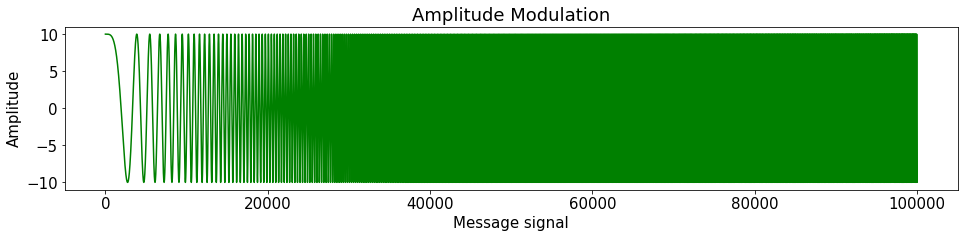

In [69]:
#Carrier wave c(t)=A_c*cos(2*pi*f_c*t)
#Modulating wave m(t)=A_m*cos(2*pi*f_m*t)
#Modulated wave s(t)=A_c[1+mu*cos(2*pi*f_m*t)]cos(2*pi*f_c*t)

# A_c = float(input('Enter carrier amplitude: '))
# f_c = float(input('Enter carrier frquency: '))
# A_m = float(input('Enter message amplitude: '))
# f_m = float(input('Enter message frquency: '))
# modulation_index = float(input('Enter modulation index: '))
A_c = 10
f_c = 1000
A_m = 10
f_m = 10
modulation_index = 1

t = np.linspace(0, 5.4,100000)


# 变频的话只要动一下f_m就行。
modulator = A_m*np.cos(2*np.pi*((10+((80-10)/5.4))*t)*t)


plt.subplot(2,1,1)
plt.title('Amplitude Modulation')
plt.plot(modulator,'g')
plt.ylabel('Amplitude')
plt.xlabel('Message signal')


plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 9)


carrier = A_c*np.cos(2*np.pi*f_c*t)

product = A_c*(1+modulation_index*np.cos(2*np.pi*((10+((80-10)/5.4))*t)*t))*np.cos(2*np.pi*f_c*t)

# product = carrier+modulator



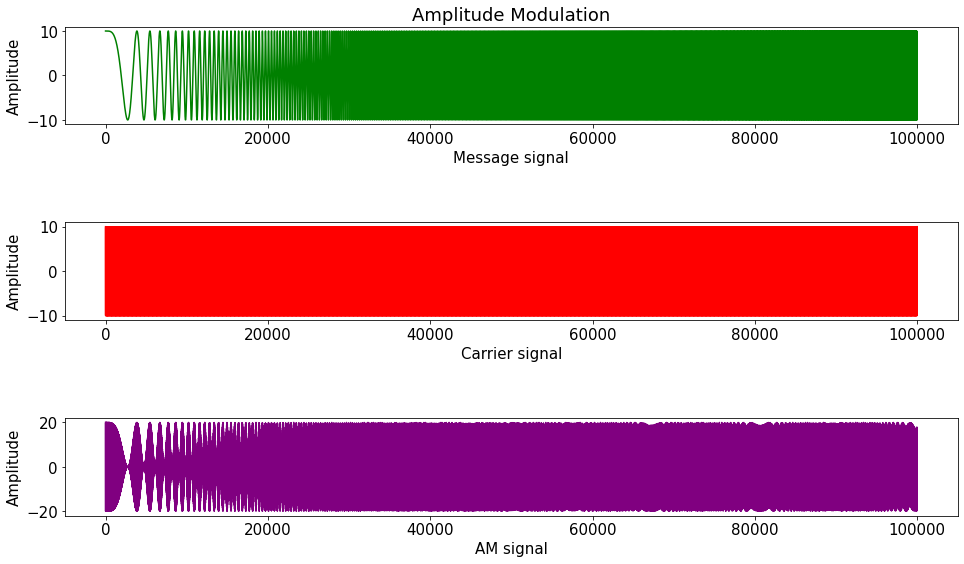

In [70]:

plt.subplot(3,1,1)
plt.title('Amplitude Modulation')
plt.plot(modulator,'g')
plt.ylabel('Amplitude')
plt.xlabel('Message signal')

plt.subplot(3,1,2)
plt.plot(carrier, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')

plt.subplot(3,1,3)
plt.plot(product, color="purple")
plt.ylabel('Amplitude')
plt.xlabel('AM signal')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 9)

fig.savefig('Amplitude Modulation.png', dpi=100)

In [74]:
# Samples per second
sps = 1/(5.4/10000)
# Duration
duration_s = 5.4

# ac: amplitude of the carrier. Should be kept at 1.0 in this script
# you would modify it if you were micing it with, or modulating other,
# waveforms.

# carrier_hz: Frequency of the carrier
# fm_hz: Frequency of the frequency modulator
# k_p: deviation constant



# Our final waveform is going to be calculated as the cosine of carrier and
# frequency modulated terms.

# First, define our range of sample numbers
each_sample_number = np.arange(duration_s * sps)

# Create the term that create the carrier


# Now create the term that is the frequency modulator


# Now create the modulated waveform, and attenuate it
waveform = np.cos(carrier + modulator)
waveform_quiet = waveform * 0.3

# Adjust amplitude of waveform and write the .wav file.
waveform_integers = np.int16(waveform_quiet * )
write('fm-out.wav', sps, waveform_integers)

# Play the waveform out the speakers
sd.play(waveform_quiet, sps)
time.sleep(duration_s)
sd.stop()

error: required argument is not an integer